<a href="https://colab.research.google.com/github/mehdi-torki/ml-learning-journey/blob/main/CaliforniaHousing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cost 100: 2.353223466344162
cost 200: 1.983810038041524
cost 300: 1.6817596827287231
cost 400: 1.4346770137709184
cost 500: 1.2324713637867635
cost 600: 1.066921307988905
cost 700: 0.9313235661681687
cost 800: 0.8202093043679968
cost 900: 0.729114459393019
cost 1000: 0.6543934944087451
cost 1100: 0.5930681615911865
cost 1200: 0.5427045452825789
cost 1300: 0.5013129958339083
cost 1400: 0.46726662226241733
cost 1500: 0.4392348529465886
cost 1600: 0.41612924495087833
cost 1700: 0.3970592603546912
cost 1800: 0.3812961600615518
cost 1900: 0.3682435136806932
cost 2000: 0.35741310517562114
cost 2100: 0.34840524141401996
cost 2200: 0.34089265508812605
cost 2300: 0.33460734309112655
cost 2400: 0.32932980302286896
cost 2500: 0.3248802294122329
cost 2600: 0.321111311784287
cost 2700: 0.317902342330537
cost 2800: 0.3151543944551373
cost 2900: 0.31278637712938023
cost 3000: 0.31073180562255187
cost 3100: 0.308936158275425
cost 3200: 0.30735471275059706
cost 3300: 0.3059507746135469
cost 3400: 0.304

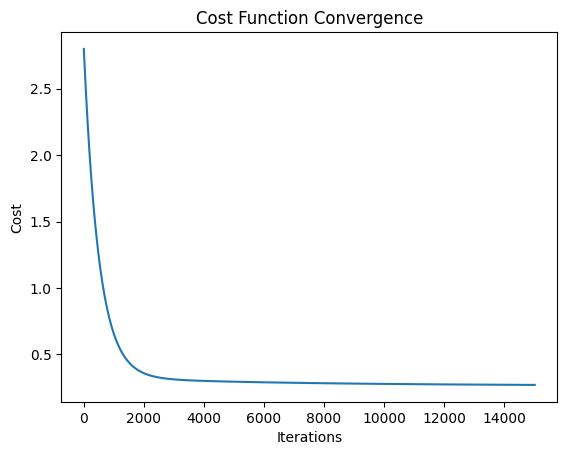

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

#data = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

def cost_function(X, w, b, y):
    predictors = np.dot(X, w) + b
    errors = predictors - y
    return np.sum(np.square(errors)) / (2 * len(y))

def gradient_descent(X, w, b, y, learning_rate):
    predictors = np.dot(X, w) + b
    errors = predictors - y

    dw = np.dot(X.T, errors) / len(y)
    db = np.sum(errors) / len(y)
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b


# Fetch dataset
california_housing = fetch_california_housing()

# Features (X) and Target (y)
X = california_housing.data    # NumPy array
y = california_housing.target  # NumPy array

w = np.zeros(X.shape[1])
b = 0.0
count = 0
epsilon = 1e-6

learning_rate = 0.001
scalar = StandardScaler()
X = scalar.fit_transform(X)

prev_cost = float('inf')
cost_history = []
while count < 20000:
    w, b = gradient_descent(X, w, b, y, learning_rate)

    count += 1

    cost = cost_function(X, w, b, y)
    cost_history.append(cost)
    if (count % 100 == 0):
        print(f'cost {count}: {cost}')
    if (abs(prev_cost - cost) < epsilon):
        break

    prev_cost = cost

print(f'cost {count}: {cost_function(X, w, b, y)}')
print(f"w: {w[:5]}... (showing first 5 coefficients)")
print(f"b: {b}")

plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()
